# User Profiling and Segmentation

   User ID  ...                                      Top Interests
0        1  ...                                  Digital Marketing
1        2  ...                                       Data Science
2        3  ...                               Fitness and Wellness
3        4  ...                                 Gaming, DIY Crafts
4        5  ...  Fitness and Wellness, Investing and Finance, G...

[5 rows x 16 columns]
User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests       

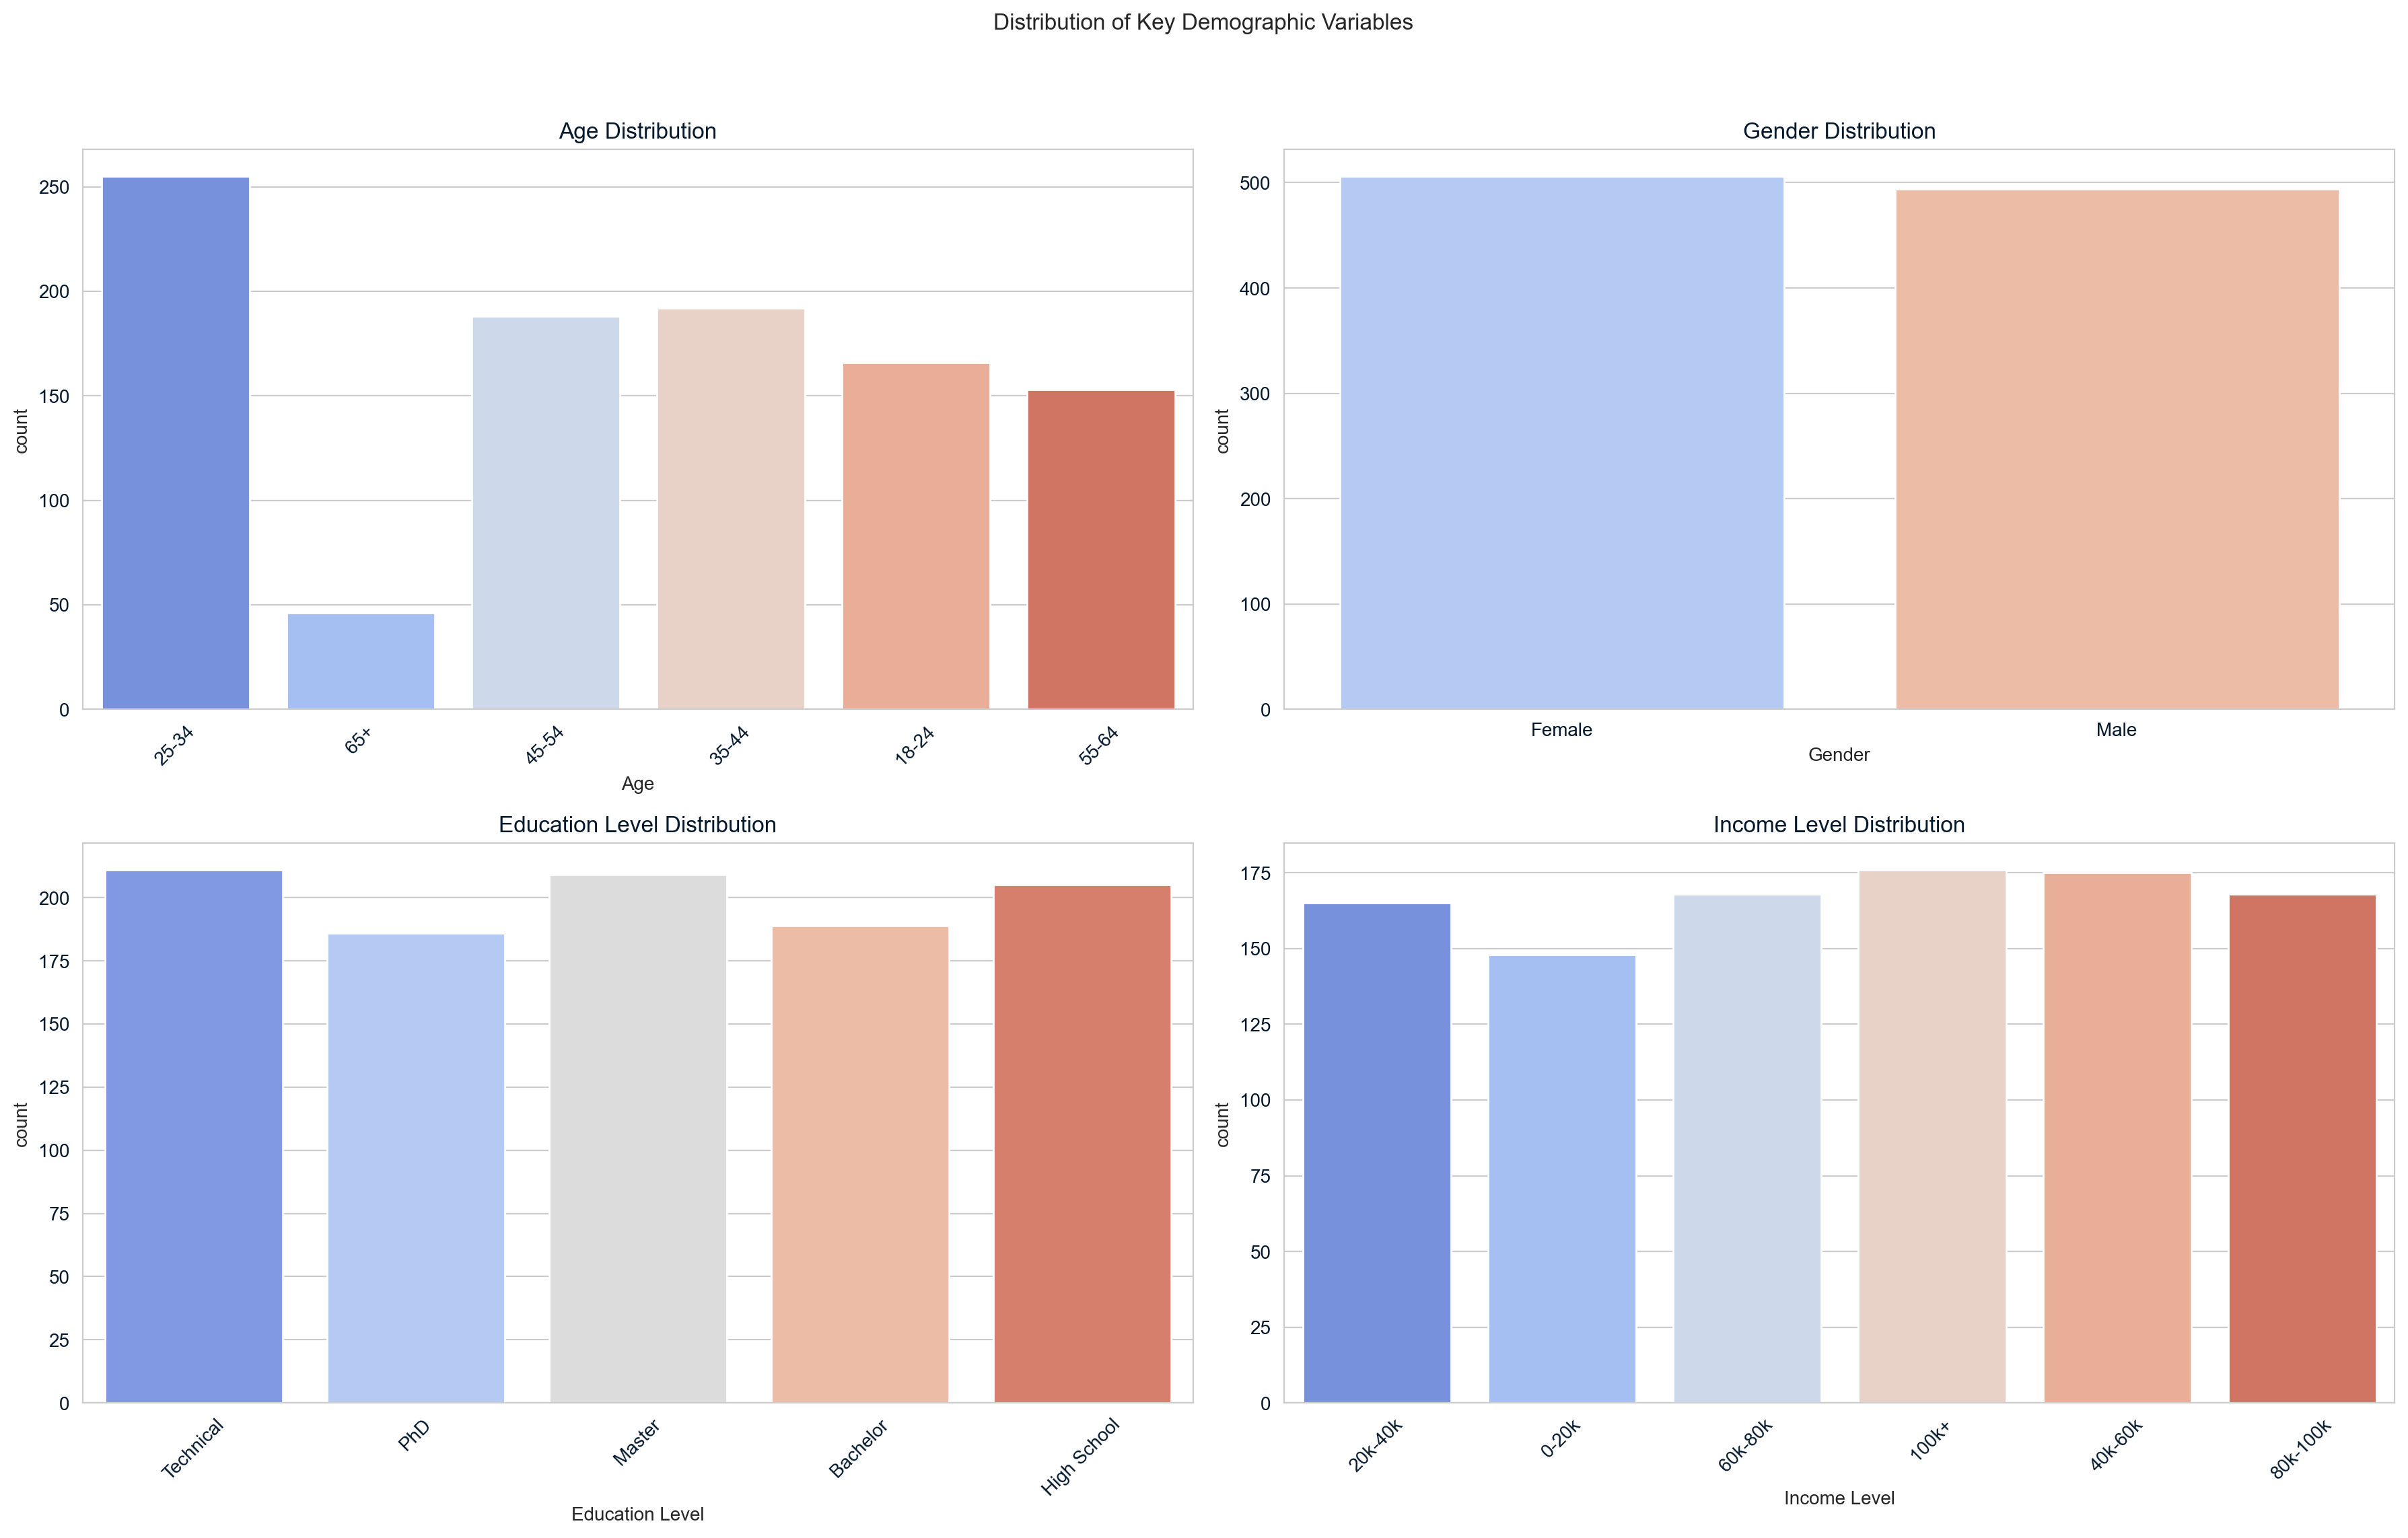

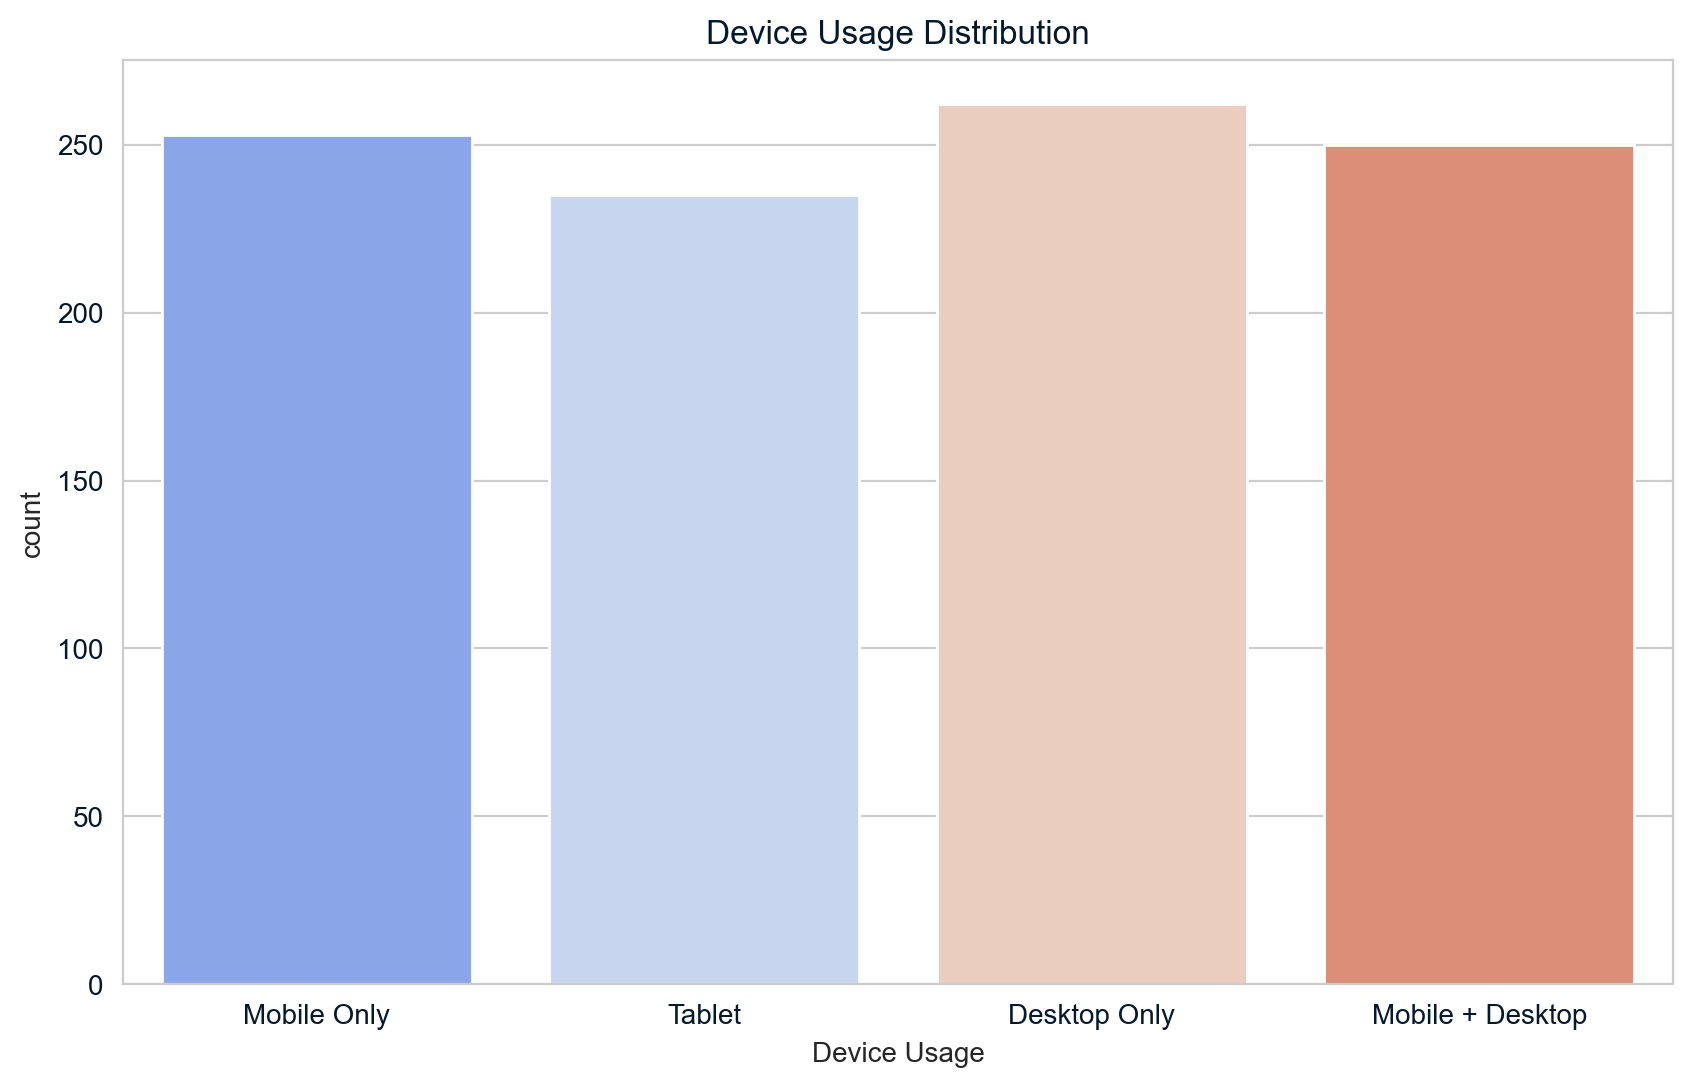

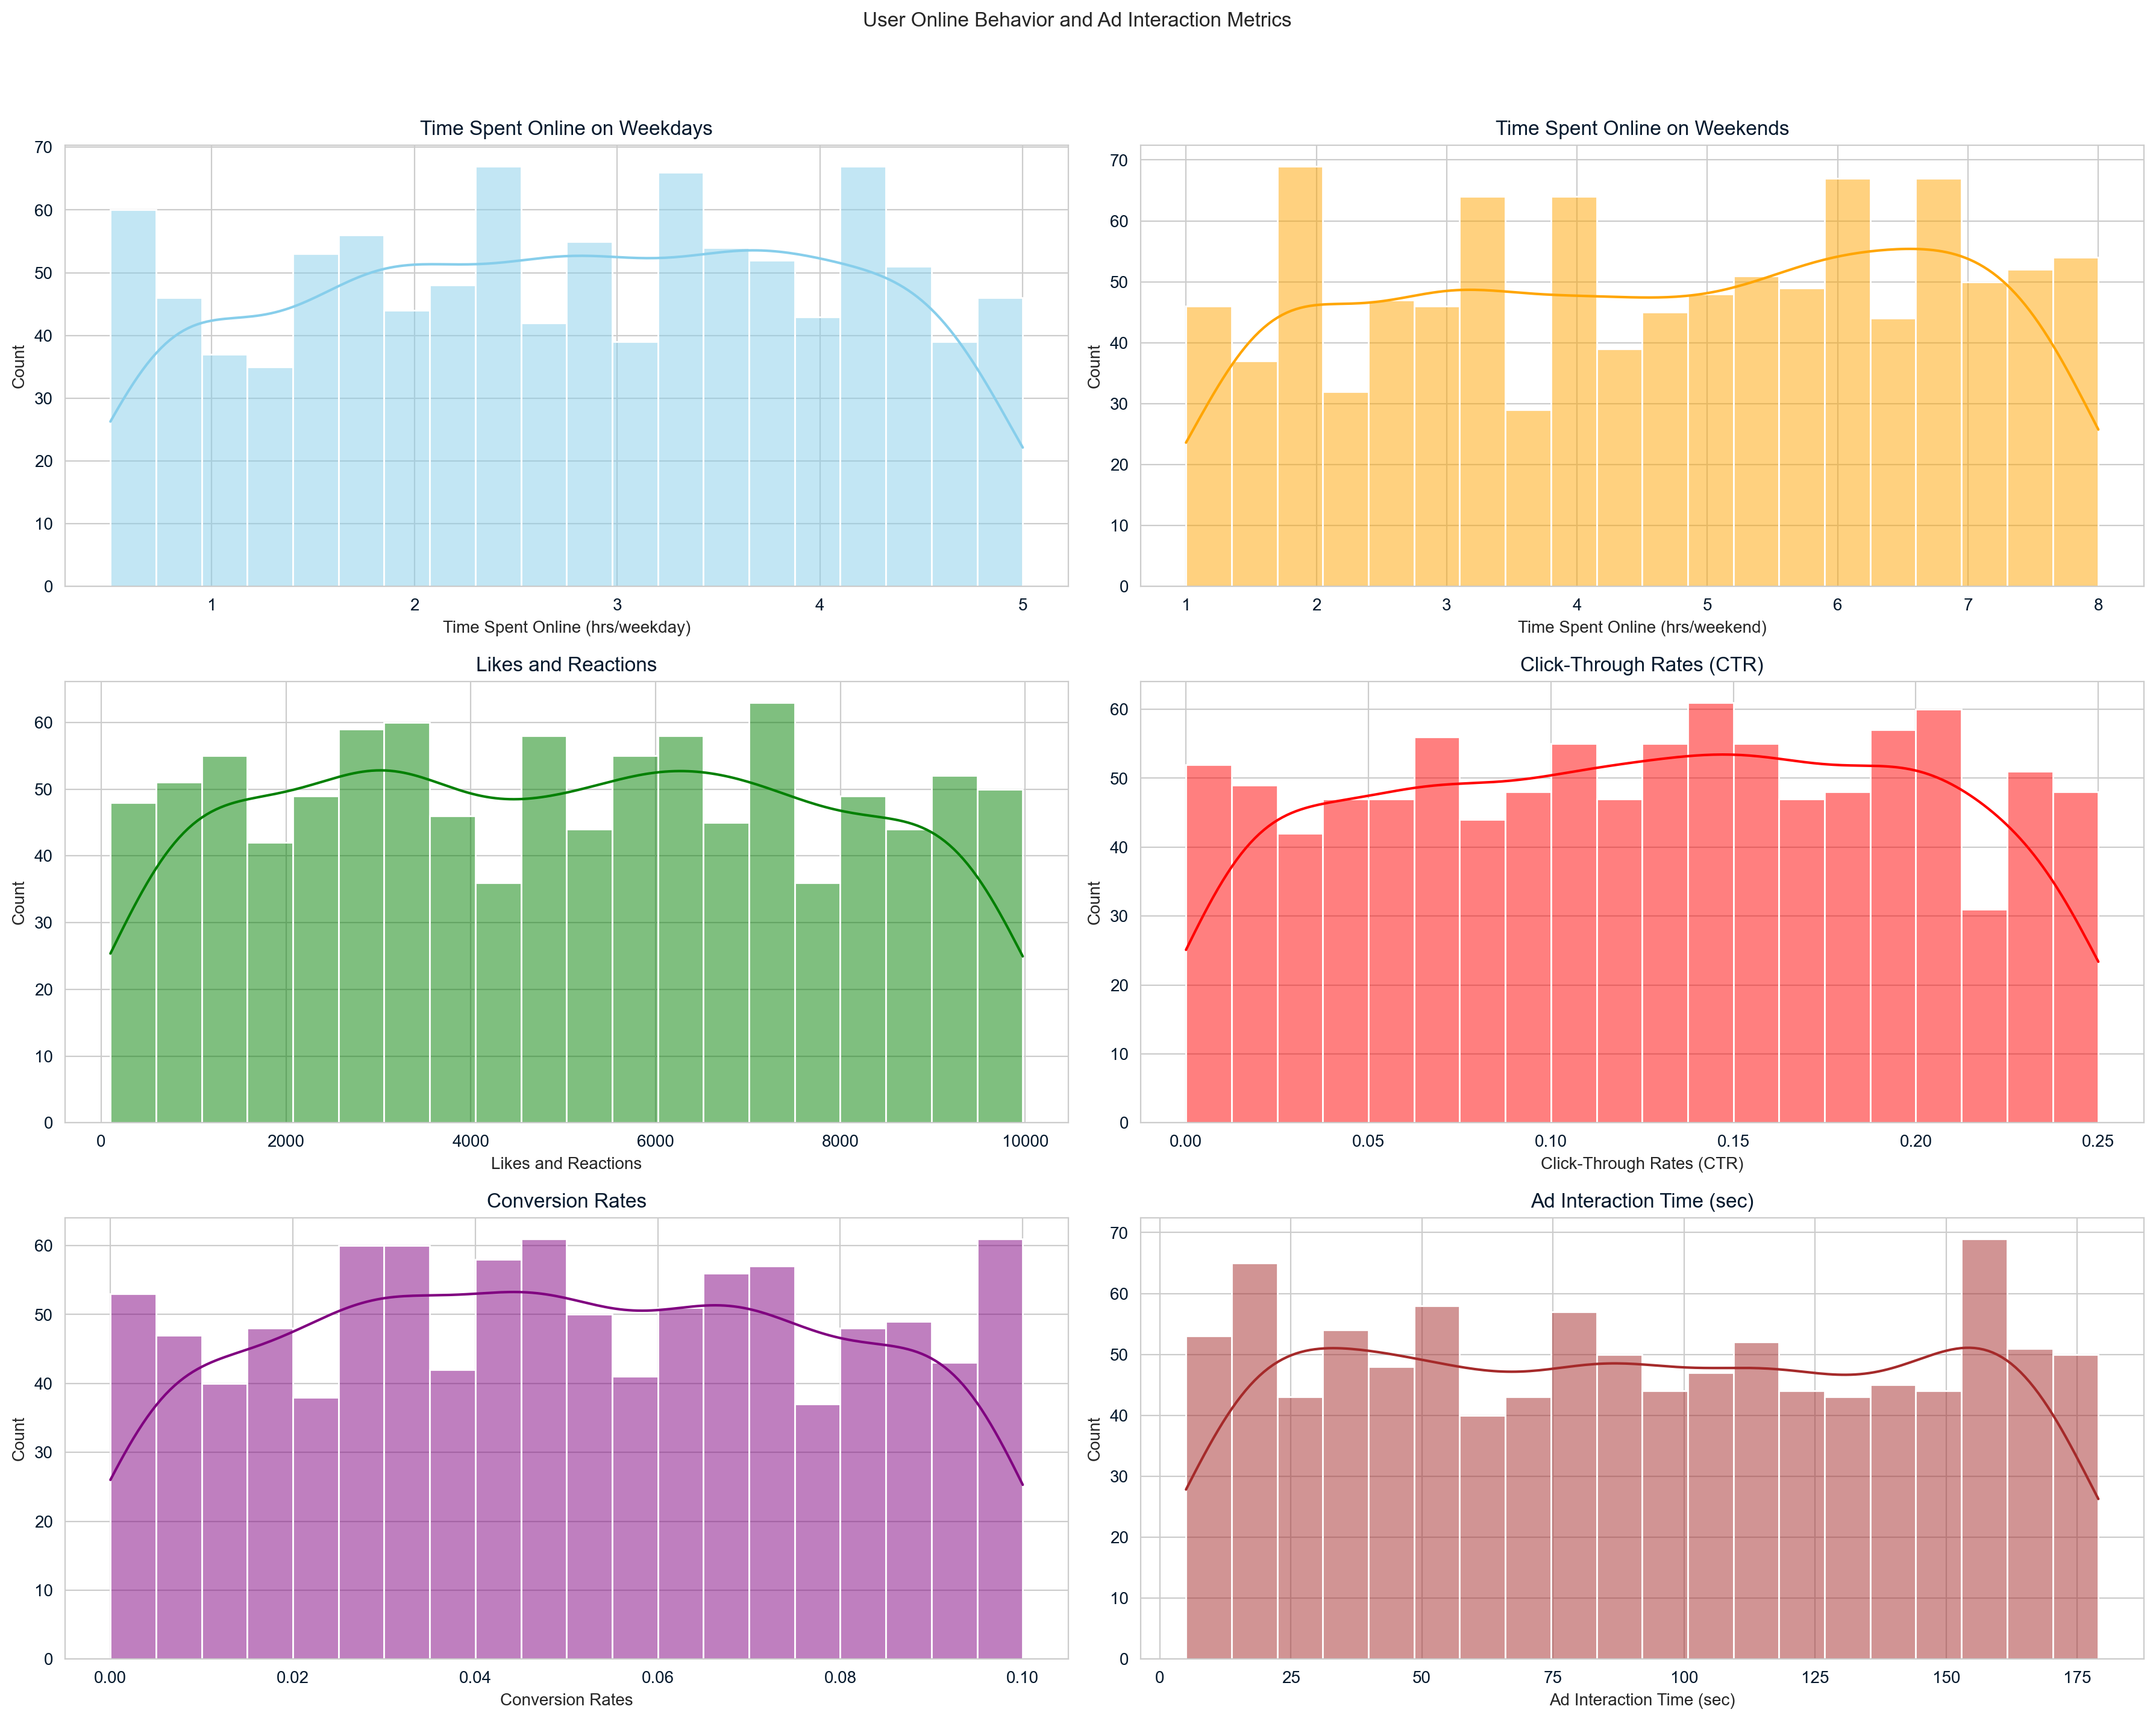

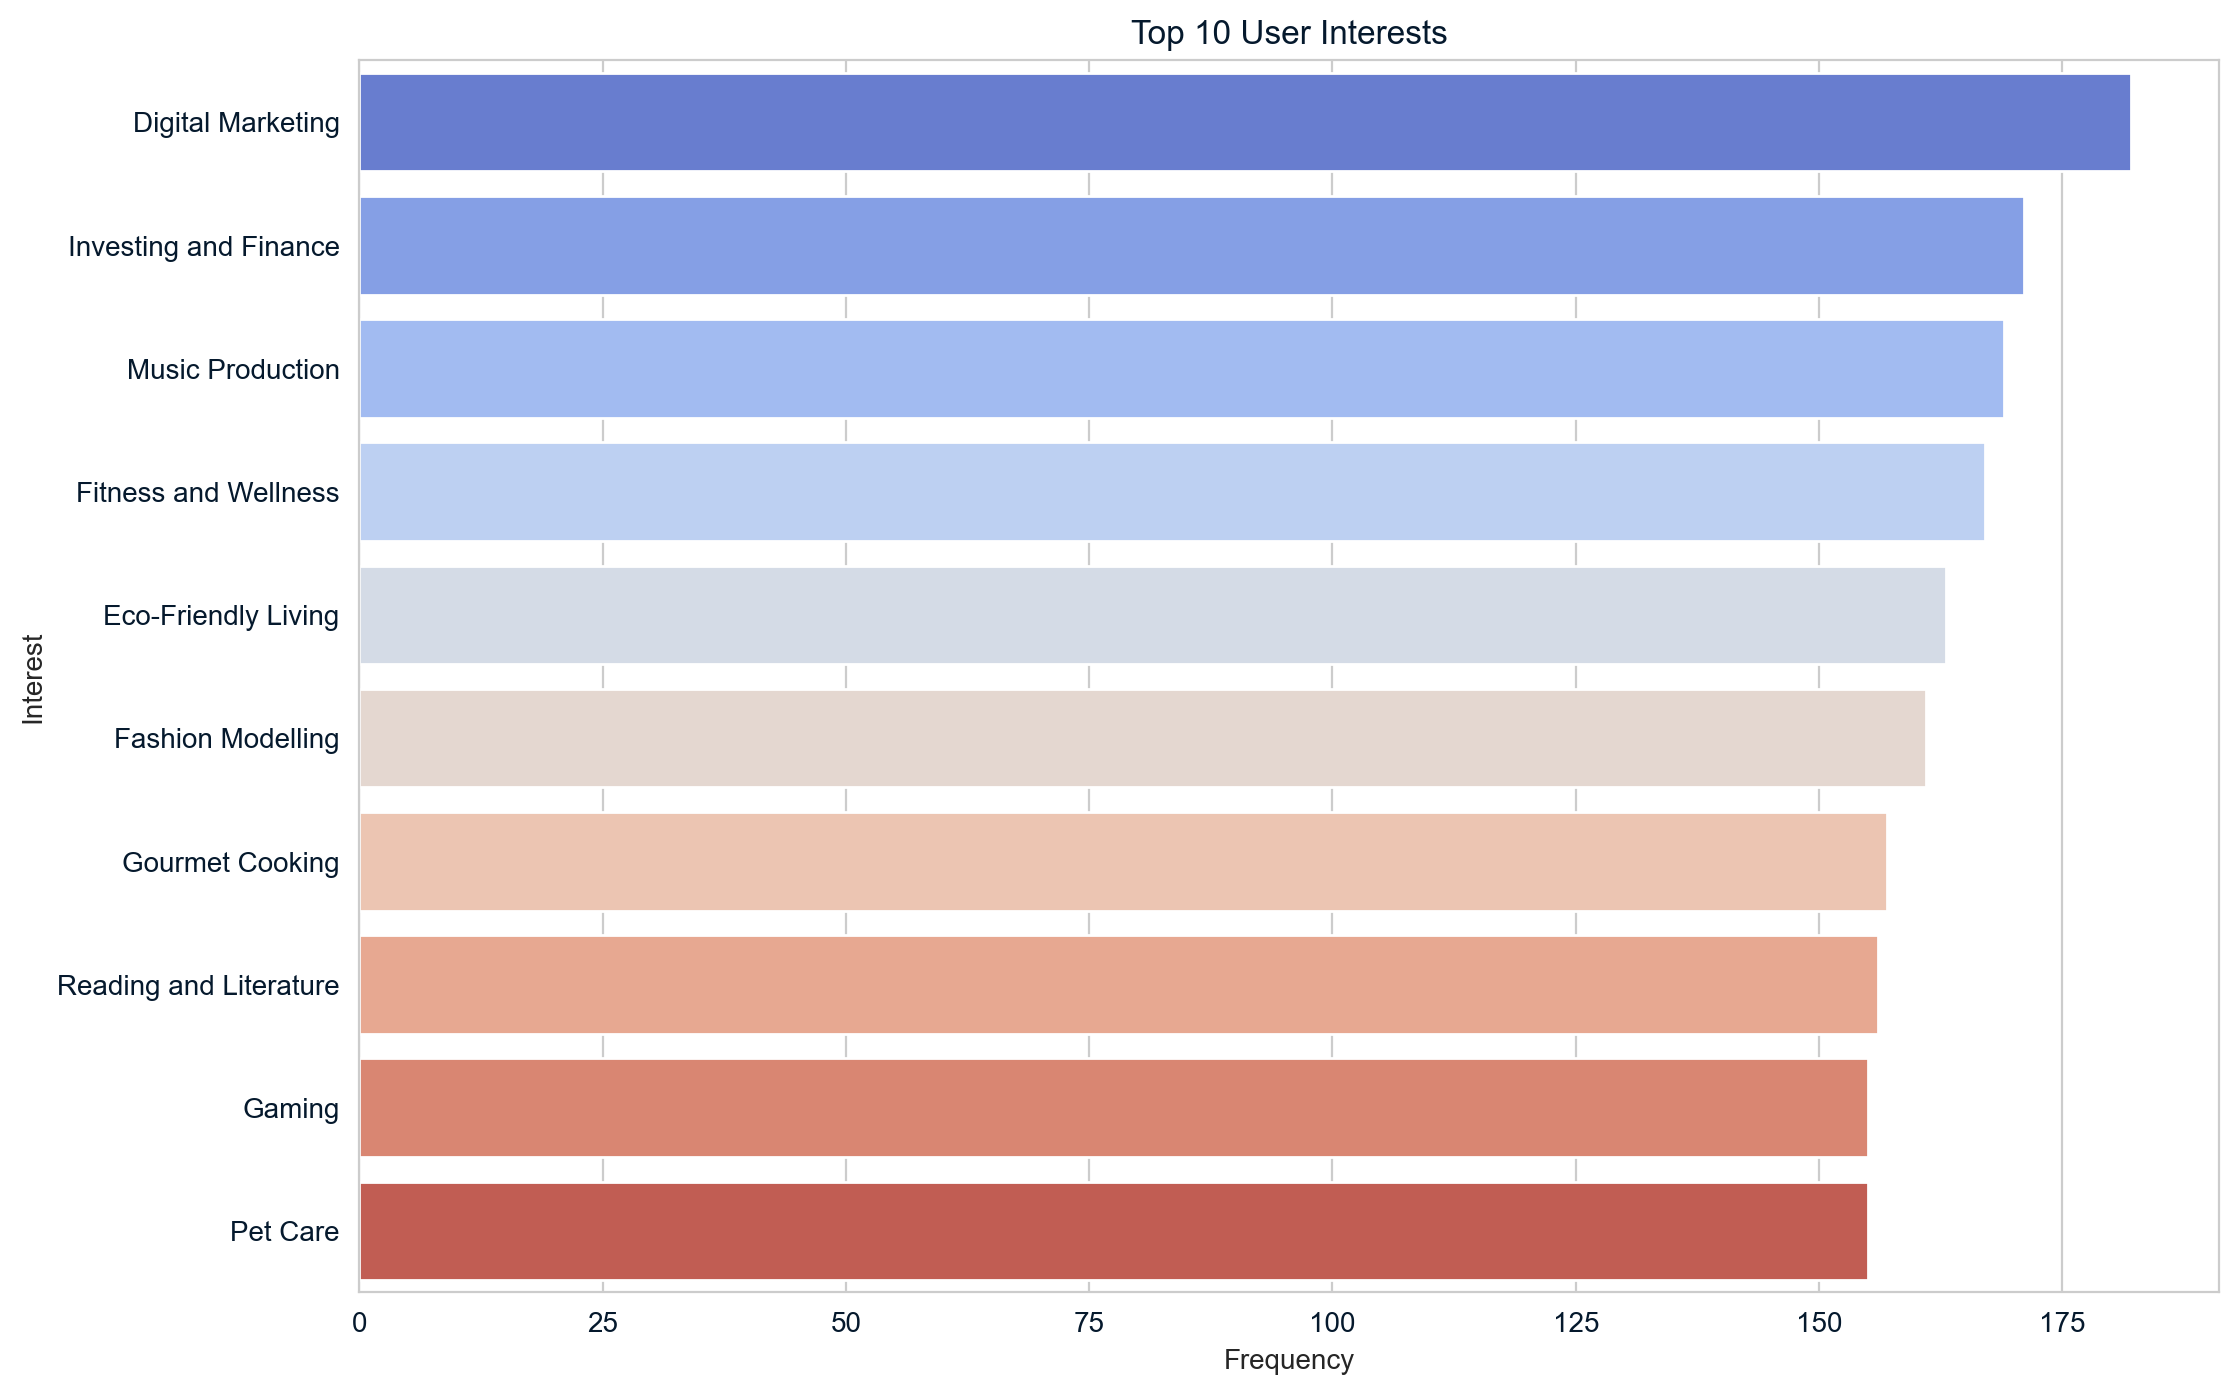

   User ID    Age  ...                                      Top Interests Cluster
0        1  25-34  ...                                  Digital Marketing       1
1        2    65+  ...                                       Data Science       0
2        3  45-54  ...                               Fitness and Wellness       3
3        4  35-44  ...                                 Gaming, DIY Crafts       1
4        5  25-34  ...  Fitness and Wellness, Investing and Finance, G...       1

[5 rows x 17 columns]
         Time Spent Online (hrs/weekday)  ...  Income Level
Cluster                                   ...              
0                               1.632955  ...      80k-100k
1                               2.937500  ...         100k+
2                               3.364532  ...       60k-80k
3                               3.872986  ...       60k-80k
4                               1.558235  ...         0-20k

[5 rows x 7 columns]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import numpy as np
import plotly.graph_objects as go

# Loading the dataset
data = pd.read_csv("user_profiles_for_ads.csv")

# Displaying the first few rows of the dataset
print(data.head())

# Checking for missing values in the dataset
print(data.isnull().sum())

# Exploratory Data Analysis
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating subplots for demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Demographic Variables')

# Age distribution
sns.countplot(ax=axes[0, 0], x='Age', data=data, palette='coolwarm')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gender distribution
sns.countplot(ax=axes[0, 1], x='Gender', data=data, palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')

# Education level distribution
sns.countplot(ax=axes[1, 0], x='Education Level', data=data, palette='coolwarm')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Income level distribution
sns.countplot(ax=axes[1, 1], x='Income Level', data=data, palette='coolwarm')
axes[1, 1].set_title('Income Level Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Device usage distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Usage', data=data, palette='coolwarm')
plt.title('Device Usage Distribution')
plt.show()

# Creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# Time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent Online (hrs/weekday)', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# Time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekend)', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# Likes and reactions
sns.histplot(ax=axes[1, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# Click-through rates
sns.histplot(ax=axes[1, 1], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# Conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# Ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time (sec)', data=data, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analyzing user interests
# Splitting and counting interests
interests_list = data['Top Interests'].str.split(', ').sum()
interests_counter = Counter(interests_list)
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plotting top interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

# User Profiling and Segmentation
# Selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
X = data[features]

# Preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data['Cluster'] = cluster_labels

# Displaying the first few rows with cluster labels
print(data.head())

# Computing the mean values of numerical features for each cluster
cluster_means = data.groupby('Cluster')[numeric_features].mean()

# Finding mode for categorical features within clusters
for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

# Preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)
radar_df = cluster_means[features_to_plot].reset_index()

# Normalizing the data for radar chart
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

radar_df_normalized = radar_df_normalized.append(radar_df_normalized.iloc[0])

# Assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

fig = go.Figure()

# Adding segments to radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],
        theta=labels.tolist() + [labels[0]],
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]+[f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]
    ))

# Finalizing the radar chart layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)

fig.show()

